# **Introduction**
For this activity, you are a member of an analytics team for the Environmental Protection Agency. You are assigned to analyze data on air quality with respect to carbon monoxide—a major air pollutant—and report your findings. The data utilized in this activity includes information from over 200 sites, identified by their state name, county name, city name, and local site name. You will use effective sampling within this dataset.

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats

In [21]:
epa_data = pd.read_csv("/content/_c4_epa_air_quality.csv")

In [22]:
epa_data.head(10)

,Unnamed: 0,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi
0,0,2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,0.473684,7
1,1,2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,0.263158,5
2,2,2018-01-01,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,0.111111,2
3,3,2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,0.300000,3
4,4,2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,0.215789,3
5,5,2018-01-01,Hawaii,Honolulu,Not in a city,Kapolei,Carbon monoxide,Parts per million,0.994737,14
6,6,2018-01-01,Hawaii,Honolulu,Not in a city,Kapolei,Carbon monoxide,Parts per million,0.200000,2
7,7,2018-01-01,Pennsylvania,Erie,Erie,NaN,Carbon monoxide,Parts per million,0.200000,2
8,8,2018-01-01,Hawaii,Honolulu,Honolulu,Honolulu,Carbon monoxide,Parts per million,0.400000,5
9,9,2018-01-01,Colorado,Larimer,Fort Collins,Fort Collins - CSU - S. Mason,Carbon monoxide,Parts per million,0.300000,6


In [23]:
#generating table of descriptive statistics

epa_data.describe(include='all')

,Unnamed: 0,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi
count,260.000000,260,260,260,260,257,260,260,260.000000,260.000000
unique,NaN,1,52,149,190,253,1,1,NaN,NaN
top,NaN,2018-01-01,California,Los Angeles,Not in a city,Kapolei,Carbon monoxide,Parts per million,NaN,NaN
freq,NaN,260,66,14,21,2,260,260,NaN,NaN
mean,129.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.403169,6.757692
std,75.199734,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.317902,7.061707
min,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
25%,64.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.200000,2.000000
50%,129.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.276315,5.000000
75%,194.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.516009,9.000000


Based on the table of descriptive statistics, the mean value of the aqi column is: 6.757692. Additionally, the count value for the aqi column is 260.

In [25]:
population_mean = epa_data['aqi'].mean()
population_mean

6.757692307692308

In [26]:
#sampling with replacement
sampled_data = epa_data.sample(n=50, replace=True, random_state=42)

In [28]:
sampled_data.head(10)

,Unnamed: 0,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi
102,102,2018-01-01,Texas,Harris,Houston,Clinton,Carbon monoxide,Parts per million,0.157895,2
106,106,2018-01-01,California,Imperial,Calexico,Calexico-Ethel Street,Carbon monoxide,Parts per million,1.183333,26
71,71,2018-01-01,Alabama,Jefferson,Birmingham,Arkadelphia/Near Road,Carbon monoxide,Parts per million,0.200000,2
188,188,2018-01-01,Arizona,Maricopa,Tempe,Diablo,Carbon monoxide,Parts per million,0.542105,10
20,20,2018-01-01,Virginia,Roanoke,Vinton,East Vinton Elementary School,Carbon monoxide,Parts per million,0.100000,1
102,102,2018-01-01,Texas,Harris,Houston,Clinton,Carbon monoxide,Parts per million,0.157895,2
121,121,2018-01-01,North Carolina,Mecklenburg,Charlotte,Garinger High School,Carbon monoxide,Parts per million,0.200000,2
214,214,2018-01-01,Florida,Broward,Davie,Daniela Banu NCORE,Carbon monoxide,Parts per million,0.273684,5
87,87,2018-01-01,California,Humboldt,Eureka,Jacobs,Carbon monoxide,Parts per million,0.393750,5
99,99,2018-01-01,California,Santa Barbara,Goleta,Goleta,Carbon monoxide,Parts per million,0.222222,3


The parameter (random_state) allows for the reproduction of the same exact sample (i.e., the same set of numbers). This means that the same rows in the dataset will be sampled with replacement each time the command is run.

In [29]:
#computing the man value from the aqi column in sampled_data, and assigning the value to the. variable sample_mean

sample_mean = sampled_data['aqi'].mean()
sample_mean

5.54

Because of the inherent randomness in taking a subset of data, the average (or mean) of that subset (sample_mean) might not match the true average of the entire dataset (population_mean). Here, the sample_mean is derived from just 50 randomly chosen AQI values, and it acts as an approximate indicator for the real average of the entire 260 AQI values in epa_data.

In [33]:
#applying the central limit theorem
estimate_list = []
for i in range(10000):
    estimate_list.append(epa_data['aqi'].sample(n=50,replace=True).mean())

In [34]:
#creating a new dataframe
estimate_df = pd.DataFrame(data={'estimate': estimate_list})
estimate_df

,estimate
0,5.52
1,6.76
2,5.68
3,5.78
4,7.18
...,...
9995,6.32
9996,7.38
9997,4.60
9998,7.80


In [35]:
#computing the mean() of sampling distribution
mean_sample_means = estimate_df['estimate'].mean()
mean_sample_means

6.733272

<Axes: >

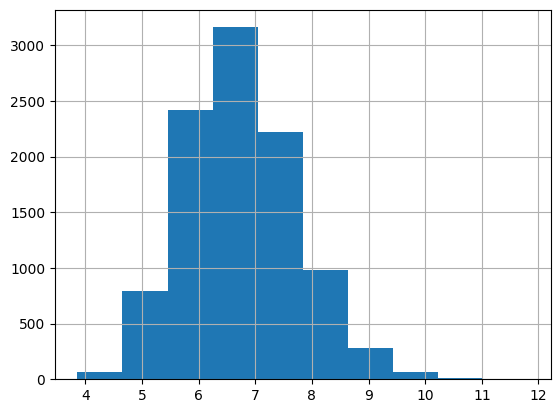

In [36]:
estimate_df['estimate'].hist()

In [37]:
#calculating standard error
standard_error = sampled_data['aqi'].std() / np.sqrt(len(sampled_data))
standard_error

0.7413225908290325

The following code overlays the density curve of the normal distribution described in the theorem on top of the histogram of the sampling distribution obtained by repeated sampling. The solid magenta line in the graph is the population mean, the blue dotted line is the mean of the 10,000 sample means, and the red dashed line is the mean of the first random sample of 50.

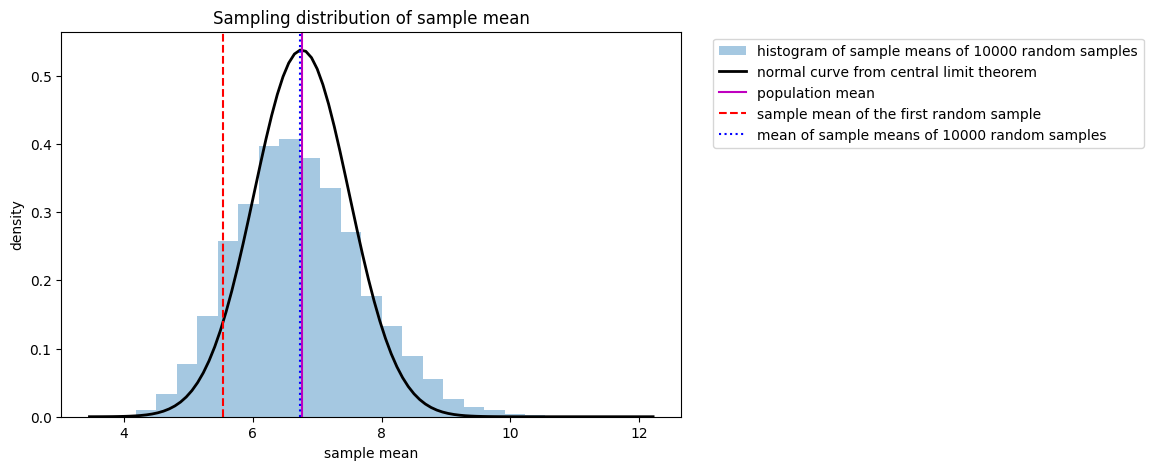

In [38]:
plt.figure(figsize=(8,5))
plt.hist(estimate_df['estimate'], bins=25, density=True, alpha=0.4, label = "histogram of sample means of 10000 random samples")
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100) # generate a grid of 100 values from xmin to xmax.
p = stats.norm.pdf(x, population_mean, standard_error)
plt.plot(x, p, 'k', linewidth=2, label = 'normal curve from central limit theorem')
plt.axvline(x=population_mean, color='m', linestyle = 'solid', label = 'population mean')
plt.axvline(x=sample_mean, color='r', linestyle = '--', label = 'sample mean of the first random sample')
plt.axvline(x=mean_sample_means, color='b', linestyle = ':', label = 'mean of sample means of 10000 random samples')
plt.title("Sampling distribution of sample mean")
plt.xlabel('sample mean')
plt.ylabel('density')
plt.legend(bbox_to_anchor=(1.04,1));

# **Insights**
- The histogram of the sampling distribution is well-approximated by the normal distribution described by the central limit theorem.
- The estimate based on one particular sample (red dashed line) is off-center. This is expected due to sampling variability. The red dashed line would be in a different location if epa_data.sample(n=50, replace=True, random_state=42) had a different value for random_state.
- The population mean (green solid line) and the mean of the sample means (blue dotted line) overlap, meaning that they are essentially equal to each other.

**What findings would you share with others?**

- The mean AQI in a sample of 50 observations was below 100 in a statistically significant sense (at least 2–3 standard errors away). For reference, AQI values at or below 100 are generally thought of as satisfactory.
This notebook didn't examine values outside the "satisfactory" range so analysis should be done to investigate unhealthy AQI values.
What would you convey to external stakeholders?

- Carbon monoxide levels are satisfactory in general.
Funding should be allocated to further investigate regions with unhealthy levels of carbon monoxide and improve the conditions in those regions.